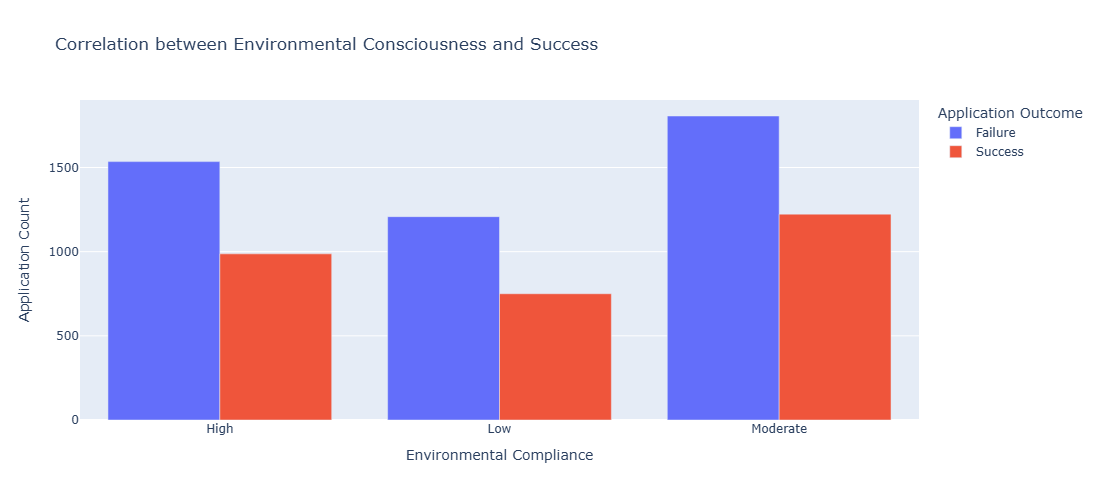

In [3]:
import pandas as pd
import plotly.express as px

df= pd.read_csv(r"C:\Users\khhu9\Downloads\velorium_grant_data_unbalanced.csv")
df.dropna(axis=0,how='any',inplace=True)

outcome_counts = pd.crosstab(df['Environmental Compliance'], df['Application Outcome'])

outcome_counts = outcome_counts.reset_index()

outcome_counts = outcome_counts.melt(id_vars='Environmental Compliance', value_vars=['Failure', 'Success'],var_name='Application Outcome', 
                                     value_name='Application Count')

fig = px.bar(outcome_counts, x='Environmental Compliance', y='Application Count', color='Application Outcome', barmode='group',
             title='Correlation between Environmental Consciousness and Success')

fig.update_layout(height=500)
fig.show()

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file="velorium_grant_data_unbalanced1.html")

C:\Users\khhu9\AppData\Local\Temp\ipykernel_42356\2639288712.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df= pd.read_csv(r"C:\Users\khhu9\Downloads\velorium_grant_data_unbalanced.csv")
df.dropna(axis=0,how='any',inplace=True)

company_size_order = ['Small', 'Medium', 'Large']
ordinal_encoder = OrdinalEncoder(categories=[company_size_order])
df['Company Size'] = ordinal_encoder.fit_transform(df[['Company Size']])

compliance_order = ['Low', 'Moderate', 'High']
ordinal_encoder_compliance = OrdinalEncoder(categories=[compliance_order])
df['Environmental Compliance'] = ordinal_encoder_compliance.fit_transform(df[['Environmental Compliance']])

label_encoder = LabelEncoder()

df = pd.get_dummies(df, columns=['Grant Program Name', 'Industry'])

label_encoder = LabelEncoder()
df['Application Outcome'] = label_encoder.fit_transform(df['Application Outcome'])


X = df.drop('Application Outcome', axis=1)
y = df['Application Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Training Set Evaluation:\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))

print('Test Set Evaluation:\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Training Set Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3398
           1       1.00      1.00      1.00      2233

    accuracy                           1.00      5631
   macro avg       1.00      1.00      1.00      5631
weighted avg       1.00      1.00      1.00      5631

Confusion Matrix:
 [[3398    0]
 [   1 2232]]
Test Set Evaluation:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64      1151
           1       0.40      0.35      0.37       727

    accuracy                           0.55      1878
   macro avg       0.51      0.51      0.51      1878
weighted avg       0.53      0.55      0.54      1878

Confusion Matrix:
 [[772 379]
 [475 252]]
Cross-validation scores: [0.52663116 0.52396804 0.53462051 0.5412783  0.53830779]
Mean CV score: 0.532961159493316
